<br/>
<center><h1>Customer clustering<h2/><center/>

<br/>
<h4>import packages<h4/>

In [115]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

<br/>
<h4>read data<h4/>

In [123]:
df = pd.read_csv('Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<br/>
<h4>convert str data to int and select some features we want for Clustering<h4/>

In [124]:
df['Gender'] = LabelEncoder().fit(['Male', 'Female']).transform(df['Gender'])
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]


features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<br/>
<h4>normalizing data<h4/>

In [125]:
x = StandardScaler().fit(features.values).transform(features.values)

<br/>
<center><h2>KMeans<h2/><center/>

<br/>
<h4>Determining the range of the number of clusters<h4/>

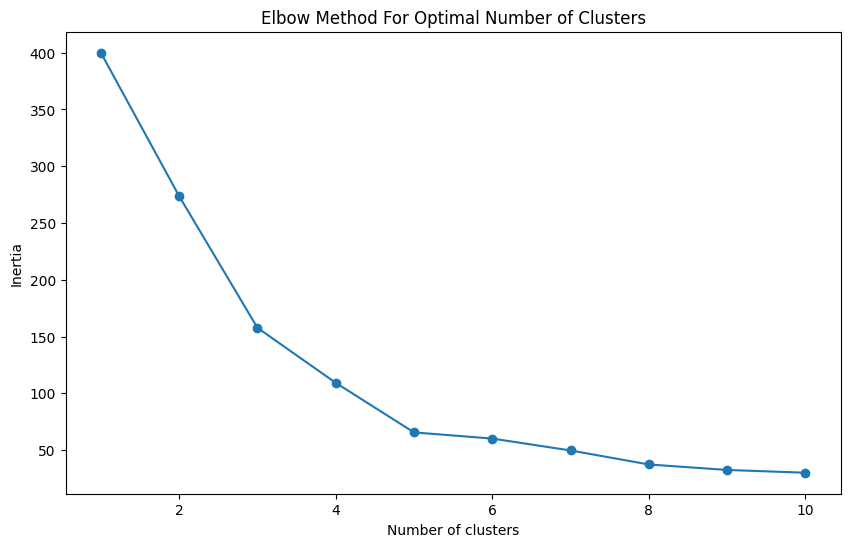

In [121]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# ploting Elbow
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

<br/>
<h4>Model training KMeans<h4/>

In [66]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(x)
labels_k_means = k_means.labels_



df["Category-with-KMeans"] = labels_k_means
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Category,Category-with-KMeans
0,1,1,19,15,39,4,4
1,2,1,21,15,81,0,2
2,3,0,20,16,6,4,4
3,4,0,23,16,77,0,2
4,5,0,31,17,40,4,4
...,...,...,...,...,...,...,...
195,196,0,35,120,79,3,1
196,197,0,45,126,28,1,0
197,198,1,32,126,74,3,1
198,199,1,32,137,18,1,0


<br/>
<h4>plotting data<h4/>

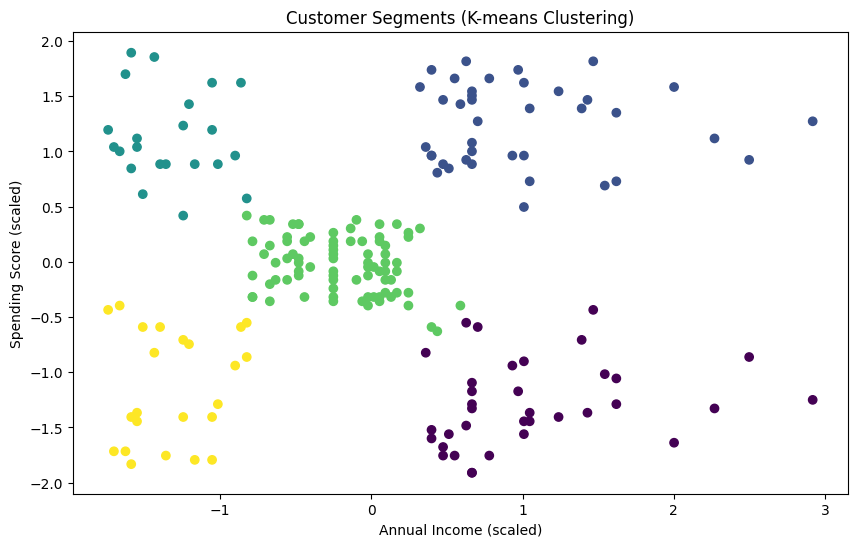

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=labels_k_means, cmap='viridis')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments (K-means Clustering)')
plt.show()

<br/>
<center><h2>DBSCAN<h2/><center/>

<br/>
<h4>Model training DBSCAN<h4/>

In [128]:
dbscan = DBSCAN(eps=0.5, min_samples=10).fit(x)
labels_dbscan = dbscan.labels_

df['Category-with-DBSCAN'] = labels_dbscan
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Category-with-DBSCAN
0,1,1,19,15,39,-1
1,2,1,21,15,81,0
2,3,0,20,16,6,1
3,4,0,23,16,77,0
4,5,0,31,17,40,-1
...,...,...,...,...,...,...
195,196,0,35,120,79,-1
196,197,0,45,126,28,-1
197,198,1,32,126,74,-1
198,199,1,32,137,18,-1


<br/>
<h4>Plotting<h4/>

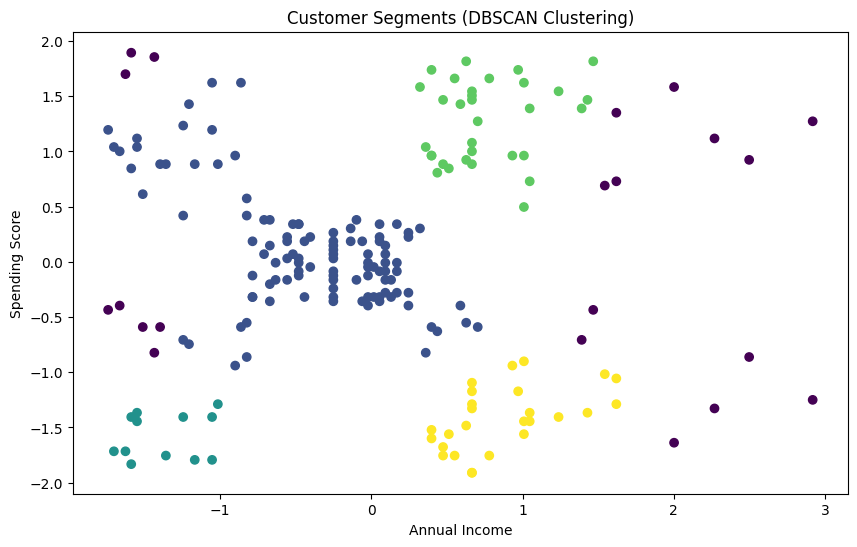

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=labels_dbscan , cmap='viridis')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments (DBSCAN Clustering)')
plt.show()

<br/>
<center><h2>Hierarchical<h2/><center/>

<br/>
<h4>plotting a dendrogram to determine the optimal number of clusters<h4/>

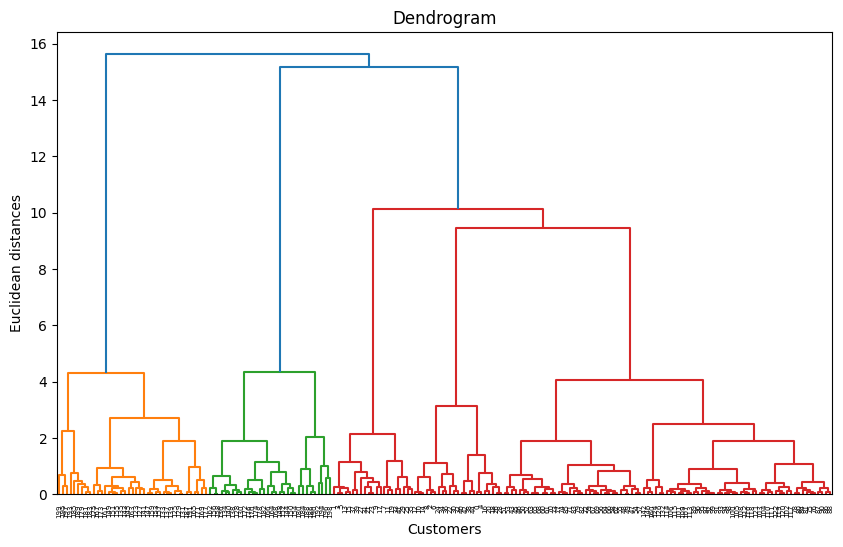

In [110]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

<br/>
<h4>Model training Hierarchical<h4/>

In [112]:
dist_matrix = euclidean_distances(x,x) 
hc = AgglomerativeClustering(n_clusters=5).fit(x)
hc_lables = hc.labels_


df['HC_Category'] = hc_lables

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Category,Category-with-KMeans,Category-with-DBSCAN,HC_Category
0,1,1,19,15,39,4,4,-1,4
1,2,1,21,15,81,0,2,0,3
2,3,0,20,16,6,4,4,-1,4
3,4,0,23,16,77,0,2,0,3
4,5,0,31,17,40,4,4,-1,4


<br/>
<h4>Plotting<h4/>

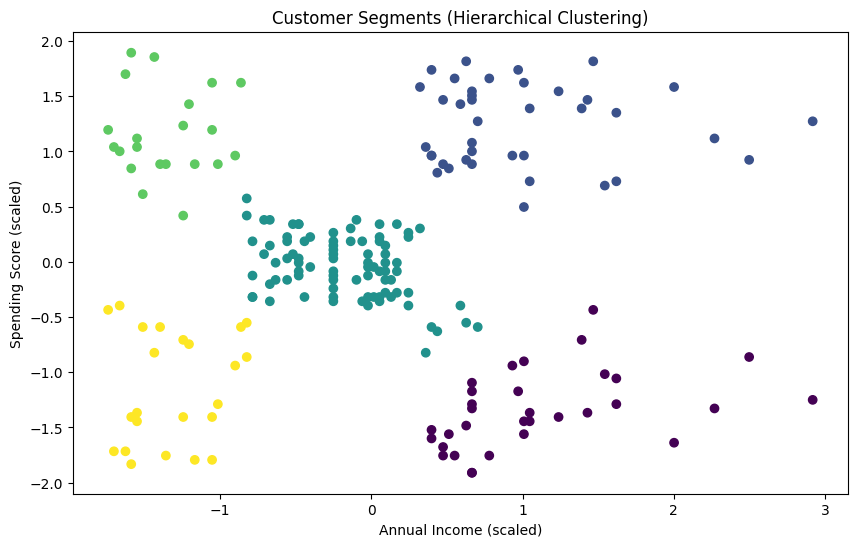

In [113]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=hc_lables)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments (Hierarchical Clustering)')
plt.show()